In [1]:
import pandas as pd

df=pd.read_csv("pokemon.csv",encoding='unicode_escape')
df.head()

,ID,Name,Form,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,,Grass,Poison,525,80,82,83,100,100,80,1
3,4,Charmander,,Fire,,309,39,52,43,60,50,65,1
4,5,Charmeleon,,Fire,,405,58,64,58,80,65,80,1


In [2]:
types=df['Type1'].isin(['Grass','Fire','Water'])
drop_cols=['Type1','Type2','Generation']
df=df[types].drop(columns=drop_cols)
df.head()

,ID,Name,Form,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,,318,45,49,49,65,65,45
1,2,Ivysaur,,405,60,62,63,80,80,60
2,3,Venusaur,,525,80,82,83,100,100,80
3,4,Charmander,,309,39,52,43,60,50,65
4,5,Charmeleon,,405,58,64,58,80,65,80


In [3]:
df.drop('Form',axis=1)

,ID,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,318,45,49,49,65,65,45
1,2,Ivysaur,405,60,62,63,80,80,60
2,3,Venusaur,525,80,82,83,100,100,80
3,4,Charmander,309,39,52,43,60,50,65
4,5,Charmeleon,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
1202,1017,Ogerpon,550,80,120,84,60,96,110
1203,1017,Ogerpon,550,80,120,84,60,96,110
1204,1017,Ogerpon,550,80,120,84,60,96,110
1206,1019,Hydrapple,540,106,80,110,120,80,44


In [4]:
from sklearn.cluster import KMeans
import numpy as np

kmeans=KMeans(n_clusters=3,random_state=3)
df['cluster']=kmeans.fit_predict(df[['Attack','Defense']])

centroids=kmeans.cluster_centers_
centroids

array([[ 77.69402985,  78.35074627],
       [ 51.03508772,  47.94736842],
       [115.53846154,  92.31868132]])

In [5]:
cen_x=[i[0] for i in centroids]
cen_y=[i[1] for i in centroids]

In [6]:
df['cen_x']=df.cluster.map({0:cen_x[0],1:cen_x[1],2:cen_x[2]})
df['cen_y']=df.cluster.map({0:cen_y[0],1:cen_y[1],2:cen_y[2]})

colors=['red','blue','green']
df['c']=df.cluster.map({0:colors[0],1:colors[1],2:colors[2]})

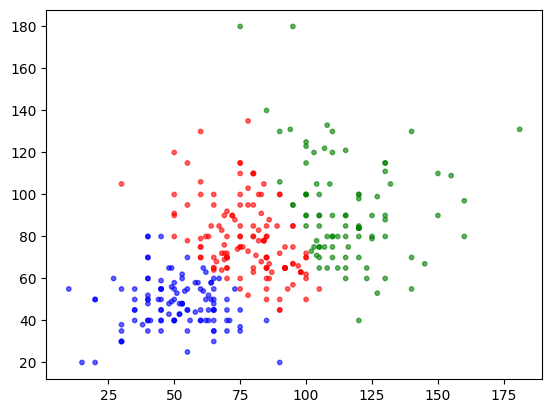

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df.Attack,df.Defense,c=df.c,alpha=0.6,s=10)